In [80]:
!pip install category_encoders

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor


Importing Indiana Memorial Union's concept 'The Vault's Grubhub sales data:

In [82]:
df=pd.read_excel('ProductMix_2024-09-01-2024-09-30.xlsx')

In [83]:
df.columns

Index(['Order Date', 'Time Interval', 'Campus', 'Venue', 'Category', 'Item',
       'Modifier Group', 'Modifier', 'Quantity', '% Quantity', 'Sale Price',
       'Subtotal Sale Price', 'Merchant Discount', 'Total Merchant Sale'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order Date           14855 non-null  object 
 1   Time Interval        14855 non-null  object 
 2   Campus               14855 non-null  object 
 3   Venue                14855 non-null  object 
 4   Category             14855 non-null  object 
 5   Item                 14855 non-null  object 
 6   Modifier Group       13923 non-null  object 
 7   Modifier             13923 non-null  object 
 8   Quantity             14855 non-null  int64  
 9   % Quantity           13794 non-null  float64
 10  Sale Price           14855 non-null  object 
 11  Subtotal Sale Price  14855 non-null  object 
 12  Merchant Discount    14855 non-null  object 
 13  Total Merchant Sale  14855 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.6+ MB


In [85]:
df.head(20)

,Order Date,Time Interval,Campus,Venue,Category,Item,Modifier Group,Modifier,Quantity,% Quantity,Sale Price,Subtotal Sale Price,Merchant Discount,Total Merchant Sale
0,09-01-24,00:00,"Indiana University, Bloomington",The Vault,Entrees,Fischer Farms 1/2 Pound Burger,Additional Sauces,House-Made Ranch,-1,100.0,$1.50,-$1.50,$0.00,-$1.50
1,09-01-24,00:00,"Indiana University, Bloomington",The Vault,Entrees,Fischer Farms 1/2 Pound Burger,Bun Choice,King's Hawaiian Bun,-1,100.0,$0.00,$0.00,$0.00,$0.00
2,09-01-24,00:00,"Indiana University, Bloomington",The Vault,Entrees,Fischer Farms 1/2 Pound Burger,Burger Temp,Medium Rare,-1,100.0,$0.00,$0.00,$0.00,$0.00
3,09-01-24,00:00,"Indiana University, Bloomington",The Vault,Entrees,Fischer Farms 1/2 Pound Burger,Condiments,Ketchup,-1,100.0,$0.00,$0.00,$0.00,$0.00
4,09-01-24,00:00,"Indiana University, Bloomington",The Vault,Entrees,Fischer Farms 1/2 Pound Burger,Customize,No Tomato,-1,100.0,$0.00,$0.00,$0.00,$0.00
5,09-01-24,00:00,"Indiana University, Bloomington",The Vault,Entrees,Fischer Farms 1/2 Pound Burger,Side Choice,Fries,-1,100.0,$0.00,$0.00,$0.00,$0.00
6,09-03-24,11:00,"Indiana University, Bloomington",The Vault,$8.99 Lunch Special,Quarter Pound Cheeseburger with fries,NaN,NaN,2,NaN,$8.99,$17.98,$0.00,$17.98
7,09-03-24,11:00,"Indiana University, Bloomington",The Vault,$8.99 Lunch Special,Quarter Pound Cheeseburger with fries,Add Cheese,Pepper Jack Cheese,1,50.0,$0.00,$0.00,$0.00,$0.00
8,09-03-24,11:00,"Indiana University, Bloomington",The Vault,$8.99 Lunch Special,Quarter Pound Cheeseburger with fries,Add Cheese,Pepper Jack Cheese,1,100.0,$0.00,$0.00,$0.00,$0.00
9,09-03-24,11:00,"Indiana University, Bloomington",The Vault,$8.99 Lunch Special,Quarter Pound Cheeseburger with fries,Bun Choice,King's Hawaiian Bun,2,100.0,$0.00,$0.00,$0.00,$0.00


In [86]:
# prompt: convert the column order date to date

df['Order Date'] = pd.to_datetime(df['Order Date'])

<ipython-input-86-dfed6e681ecf>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Dropping columns which are redundant 

In [87]:
df.drop(columns=['Venue','Campus','% Quantity','Sale Price'], inplace=True)

In [88]:
df['Order Date'].head()

,Order Date
0,2024-09-01
1,2024-09-01
2,2024-09-01
3,2024-09-01
4,2024-09-01


In [89]:
# prompt: standardize columns: Sale Price,  Subtotal Sale Price,   Merchant Discount, Total Merchant Sale . Remove the dollar sign, convert them to numerical

def clean_currency(x):
    """If the value is a string, then remove currency symbol and delimiters
    otherwise, the value will be returned as is."""
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '')
    return x

for col in ['Subtotal Sale Price', 'Merchant Discount', 'Total Merchant Sale']:
    df[col] = df[col].apply(clean_currency).astype(float)

In [90]:
# Assuming df is your DataFrame
selected_columns = ['Subtotal Sale Price', 'Merchant Discount',  'Total Merchant Sale']
df[selected_columns].head()

,Subtotal Sale Price,Merchant Discount,Total Merchant Sale
0,-1.5,0.0,-1.5
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order Date           14855 non-null  datetime64[ns]
 1   Time Interval        14855 non-null  object        
 2   Category             14855 non-null  object        
 3   Item                 14855 non-null  object        
 4   Modifier Group       13923 non-null  object        
 5   Modifier             13923 non-null  object        
 6   Quantity             14855 non-null  int64         
 7   Subtotal Sale Price  14855 non-null  float64       
 8   Merchant Discount    14855 non-null  float64       
 9   Total Merchant Sale  14855 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 1.1+ MB


In [92]:
# prompt: Remove rows where item is 'Cheese Curds ', 'Iced Tea' or 'Kids Mac & Cheese'

# Remove rows where 'Item' is 'Cheese Curds ', 'Iced Tea', or 'Kids Mac & Cheese'
df = df[~df['Item'].isin(['Cheese Curds ', 'Iced Tea', 'Kids Mac & Cheese'])]

In [93]:
df.isna().sum()

,0
Order Date,0
Time Interval,0
Category,0
Item,0
Modifier Group,922
Modifier,922
Quantity,0
Subtotal Sale Price,0
Merchant Discount,0
Total Merchant Sale,0


Filling missing values on the basis of the most frequent modifier or modifier group ocurring along with a prticular item 

In [94]:
df['Modifier Group'] = df.groupby('Item')['Modifier Group'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['Modifier'] = df.groupby('Item')['Modifier'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

<ipython-input-94-b5e2b7ce3124>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Modifier Group'] = df.groupby('Item')['Modifier Group'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
<ipython-input-94-b5e2b7ce3124>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Modifier'] = df.groupby('Item')['Modifier'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))


<Figure size 1500x600 with 0 Axes>

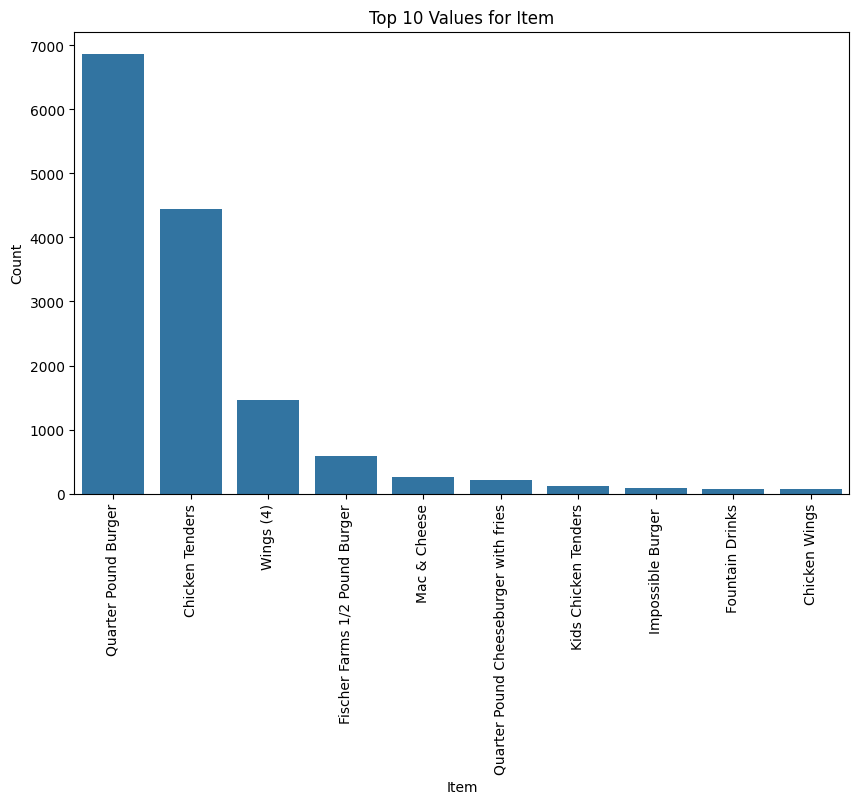

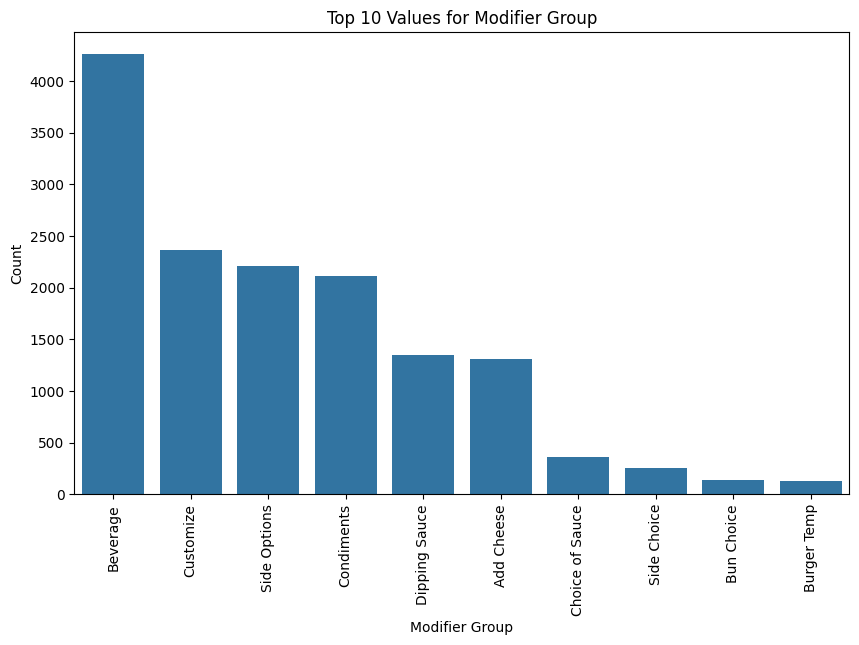

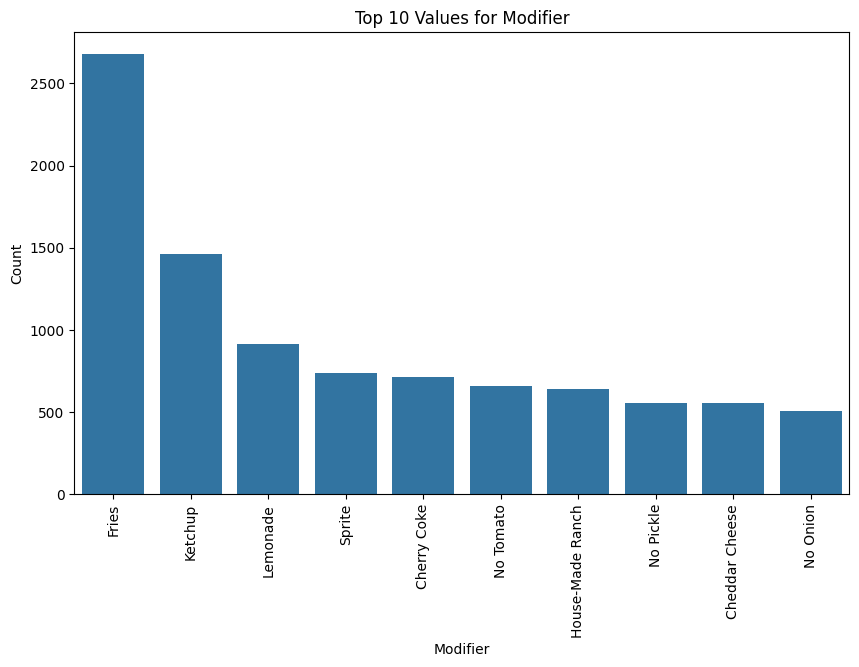

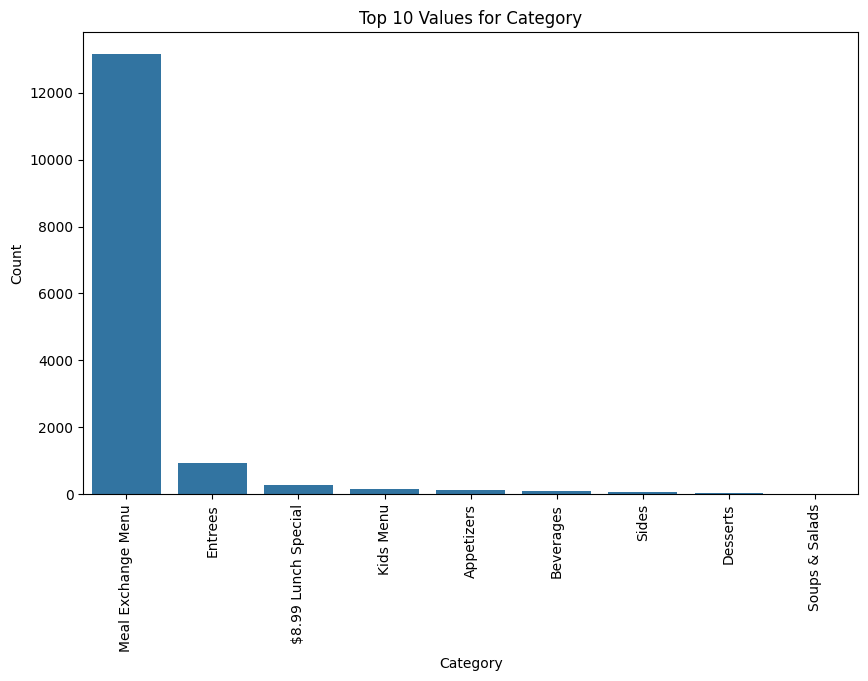

In [95]:
# prompt: visualize the columns 'item', ' modifier group', 'modifier' and 'category' with a bar chart

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Item', 'Modifier Group', 'Modifier', and 'Category' are columns in your DataFrame 'df'
# and that your DataFrame is called 'df' as in the previous code.

# Create the bar plot
plt.figure(figsize=(15, 6))  # Adjust figure size for better visualization

# Count occurrences of each unique value for specified columns
for col in ['Item', 'Modifier Group', 'Modifier', 'Category']:
    value_counts = df[col].value_counts().head(10) # showing only top 10 values to prevent overcrowding the plot
    plt.figure(figsize=(10, 6))  # Adjust figure size for each subplot
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xticks(rotation=90) # Rotate x-axis labels for readability
    plt.title(f'Top 10 Values for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [96]:
df.isna().sum()

,0
Order Date,0
Time Interval,0
Category,0
Item,0
Modifier Group,0
Modifier,0
Quantity,0
Subtotal Sale Price,0
Merchant Discount,0
Total Merchant Sale,0


In [97]:
df['Modifier'].nunique()

65

In [98]:
df['Modifier Group'].nunique()

22

In [99]:
df['Category'].nunique()

9

In [100]:
df['Item'].nunique()

36

In [101]:
df['Total Merchant Sale'].value_counts()

,count
Total Merchant Sale,
0.00,13731
1.00,321
2.00,155
3.00,84
8.99,71
1.50,61
14.99,61
12.99,46
3.99,42


In [102]:
# prompt: calculate the total value counts for total merchant sales which contain negative values

# Assuming df is your DataFrame and it has already been processed as in the previous code.
negative_sales_counts = df[df['Total Merchant Sale'] < 0]['Total Merchant Sale'].value_counts()
total_negative_sales = negative_sales_counts.sum()

print(f"Total value counts for negative 'Total Merchant Sale': {total_negative_sales}")

Total value counts for negative 'Total Merchant Sale': 15


In [103]:
# Remove rows with negative Total Merchant Sale
df = df[df['Total Merchant Sale'] >= 0]

In [104]:
# prompt: calculate the total value counts for total merchant sales which contain negative values

# Assuming df is your DataFrame and it has already been processed as in the previous code.
negative_sales_counts = df[df['Total Merchant Sale'] < 0]['Total Merchant Sale'].value_counts()
total_negative_sales = negative_sales_counts.sum()

print(f"Total value counts for negative 'Total Merchant Sale': {total_negative_sales}")

Total value counts for negative 'Total Merchant Sale': 0


In [105]:
df['Subtotal Sale Price'].value_counts()

,count
Subtotal Sale Price,
0.00,13731
1.00,321
2.00,155
3.00,84
8.99,71
14.99,61
1.50,61
12.99,46
3.99,42


In [106]:
# Step 1: Create a copy of the original DataFrame
df_encoded = df.copy()

# Step 2: Apply Target Encoding for 'Item' and 'Modifier'
target_encoder = ce.TargetEncoder(cols=['Item', 'Modifier'])
df_encoded[['Item', 'Modifier']] = target_encoder.fit_transform(df_encoded[['Item', 'Modifier']], df_encoded['Total Merchant Sale'])

# Step 3: Apply One-Hot Encoding for 'Category' and 'Modifier Group'
onehot_encoder = ce.OneHotEncoder(cols=['Category', 'Modifier Group'])
df_encoded = onehot_encoder.fit_transform(df_encoded)

# Step 4: Display the first few rows of the encoded DataFrame
print(df_encoded.head())

  Order Date Time Interval  Category_1  Category_2  Category_3  Category_4  \
1 2024-09-01         00:00           1           0           0           0   
2 2024-09-01         00:00           1           0           0           0   
3 2024-09-01         00:00           1           0           0           0   
4 2024-09-01         00:00           1           0           0           0   
5 2024-09-01         00:00           1           0           0           0   

   Category_5  Category_6  Category_7  Category_8  ...  Modifier Group_18  \
1           0           0           0           0  ...                  0   
2           0           0           0           0  ...                  0   
3           0           0           0           0  ...                  0   
4           0           0           0           0  ...                  0   
5           0           0           0           0  ...                  0   

   Modifier Group_19  Modifier Group_20  Modifier Group_21  Modifier

In [107]:
df_encoded.head()

,Order Date,Time Interval,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,...,Modifier Group_18,Modifier Group_19,Modifier Group_20,Modifier Group_21,Modifier Group_22,Modifier,Quantity,Subtotal Sale Price,Merchant Discount,Total Merchant Sale
1,2024-09-01,00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,6.564529,-1,0.0,0.0,0.0
2,2024-09-01,00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.044804,-1,0.0,0.0,0.0
3,2024-09-01,00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.038234,-1,0.0,0.0,0.0
4,2024-09-01,00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000000,-1,0.0,0.0,0.0
5,2024-09-01,00:00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.898414,-1,0.0,0.0,0.0


In [108]:
df_encoded['Time Interval'].tail(5)

,Time Interval
14850,21:00
14851,21:00
14852,21:00
14853,21:00
14854,21:00


In [109]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14828 entries, 1 to 14854
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order Date           14828 non-null  datetime64[ns]
 1   Time Interval        14828 non-null  object        
 2   Category_1           14828 non-null  int64         
 3   Category_2           14828 non-null  int64         
 4   Category_3           14828 non-null  int64         
 5   Category_4           14828 non-null  int64         
 6   Category_5           14828 non-null  int64         
 7   Category_6           14828 non-null  int64         
 8   Category_7           14828 non-null  int64         
 9   Category_8           14828 non-null  int64         
 10  Category_9           14828 non-null  int64         
 11  Item                 14828 non-null  float64       
 12  Modifier Group_1     14828 non-null  int64         
 13  Modifier Group_2     14828 non-null 

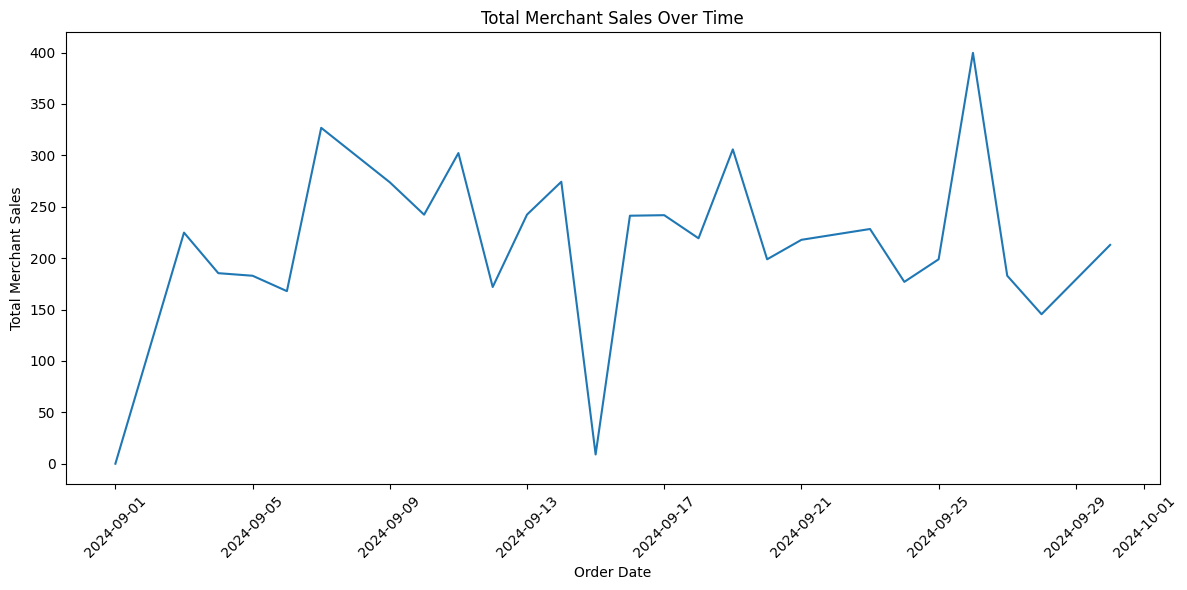

In [110]:
# prompt: visualize total merchant sales using a lineplot

# Assuming 'df_encoded' is your DataFrame with the encoded features and 'Total Merchant Sale' column
# and 'Order Date' column is already in datetime format

# Group data by 'Order Date' and sum 'Total Merchant Sale'
sales_by_date = df.groupby('Order Date')['Total Merchant Sale'].sum()

# Create the lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_by_date.index, y=sales_by_date.values)
plt.xlabel('Order Date')
plt.ylabel('Total Merchant Sales')
plt.title('Total Merchant Sales Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [111]:
from datetime import datetime

# Convert Time Interval to hour manually
df_encoded['Hour'] = df_encoded['Time Interval'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)

# # Verify the changes
# print(df[['Time Interval', 'Hour']].tail())

Creating lag features, rolling averages and time-based features in copy of df to visualize their correlation with target feature 'Total Merchant sales' to predict sales data

In [112]:
df_encoded['day_of_week'] = df_encoded['Order Date'].dt.dayofweek  # Monday=0, Sunday=6

In [113]:
df_encoded['is_weekend'] = df_encoded['day_of_week'].isin([5, 6]).astype(int)

In [114]:
# Lag features for Total Merchant Sale
df_encoded['lag_1'] = df_encoded['Total Merchant Sale'].shift(1)
df_encoded['lag_2'] = df_encoded['Total Merchant Sale'].shift(2)

# Rolling average over 3 hours
df_encoded['rolling_mean_3'] = df_encoded['Total Merchant Sale'].rolling(window=3).mean()

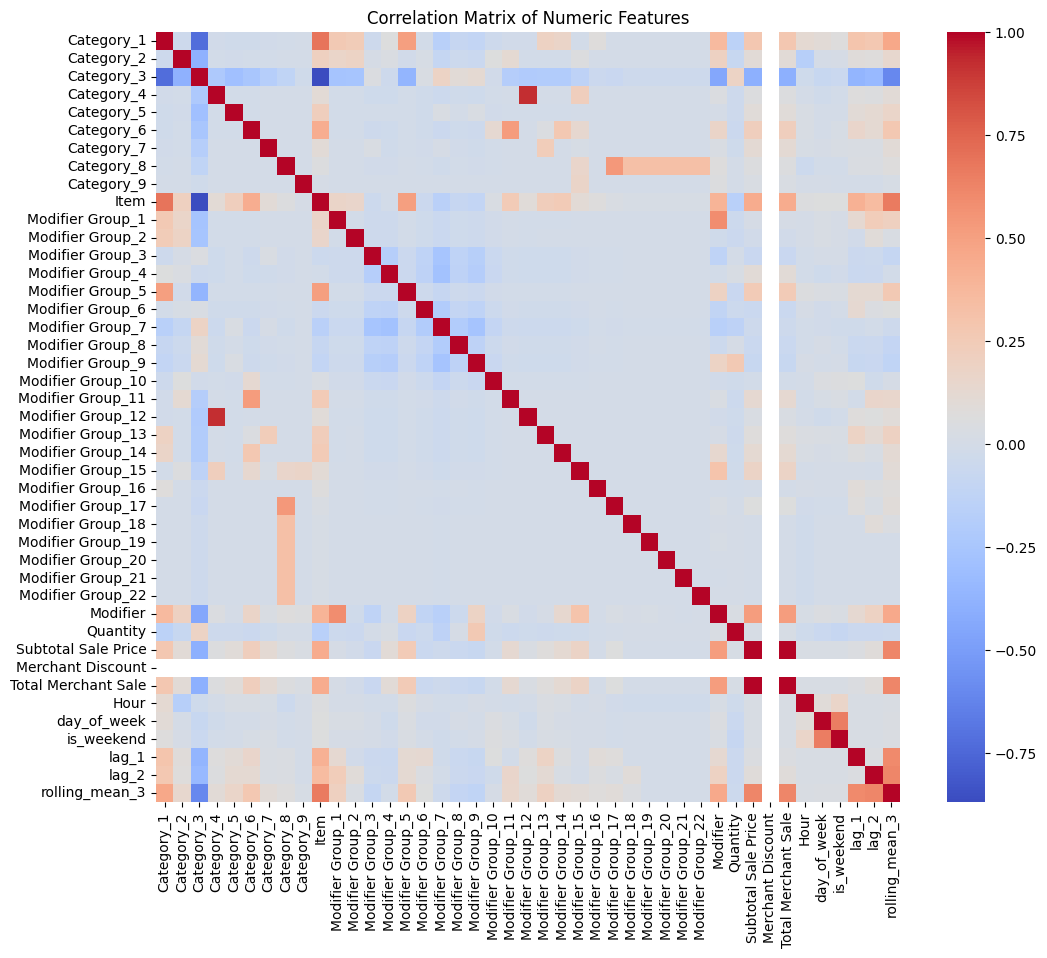

In [115]:
# prompt: visualize correlations, exclude the datetime columns and the object columns

# Assuming df_encoded is your DataFrame after encoding
# Exclude datetime columns and object columns for correlation analysis

numeric_df = df_encoded.select_dtypes(exclude=['datetime64[ns]', 'object'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Making changes accordingly in the original dataframe w.r.t. to the copy of df : df_encoded

In [116]:
from datetime import datetime

# Convert Time Interval to hour manually
df['Hour'] = df['Time Interval'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)

# Verify the changes
print(df[['Time Interval', 'Hour']].tail())

      Time Interval  Hour
14850         21:00    21
14851         21:00    21
14852         21:00    21
14853         21:00    21
14854         21:00    21


In [117]:
# Verify the changes
print(df[['Time Interval', 'Hour']].tail())

      Time Interval  Hour
14850         21:00    21
14851         21:00    21
14852         21:00    21
14853         21:00    21
14854         21:00    21


In [118]:
df['day_of_week'] = df['Order Date'].dt.dayofweek  # Monday=0, Sunday=6

In [119]:
df['day_of_week'].tail()

,day_of_week
14850,0
14851,0
14852,0
14853,0
14854,0


In [120]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [121]:
df['is_weekend'].tail()

,is_weekend
14850,0
14851,0
14852,0
14853,0
14854,0


In [122]:
df['is_weekend'].head()

,is_weekend
1,1
2,1
3,1
4,1
5,1


In [123]:
# Lag features for Total Merchant Sale
df['lag_1'] = df['Total Merchant Sale'].shift(1)
df['lag_2'] = df['Total Merchant Sale'].shift(2)

# Rolling average over 3 hours
df['rolling_mean_3'] = df['Total Merchant Sale'].rolling(window=3).mean()

In [124]:
# prompt: generate a feature 'rolling_mean_2' which will be rolling average over 2 hours

# Rolling average over 5 hours
df['rolling_mean_5'] = df['Total Merchant Sale'].rolling(window=5).mean()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14828 entries, 1 to 14854
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order Date           14828 non-null  datetime64[ns]
 1   Time Interval        14828 non-null  object        
 2   Category             14828 non-null  object        
 3   Item                 14828 non-null  object        
 4   Modifier Group       14828 non-null  object        
 5   Modifier             14828 non-null  object        
 6   Quantity             14828 non-null  int64         
 7   Subtotal Sale Price  14828 non-null  float64       
 8   Merchant Discount    14828 non-null  float64       
 9   Total Merchant Sale  14828 non-null  float64       
 10  Hour                 14828 non-null  int64         
 11  day_of_week          14828 non-null  int32         
 12  is_weekend           14828 non-null  int64         
 13  lag_1                14827 non-null 

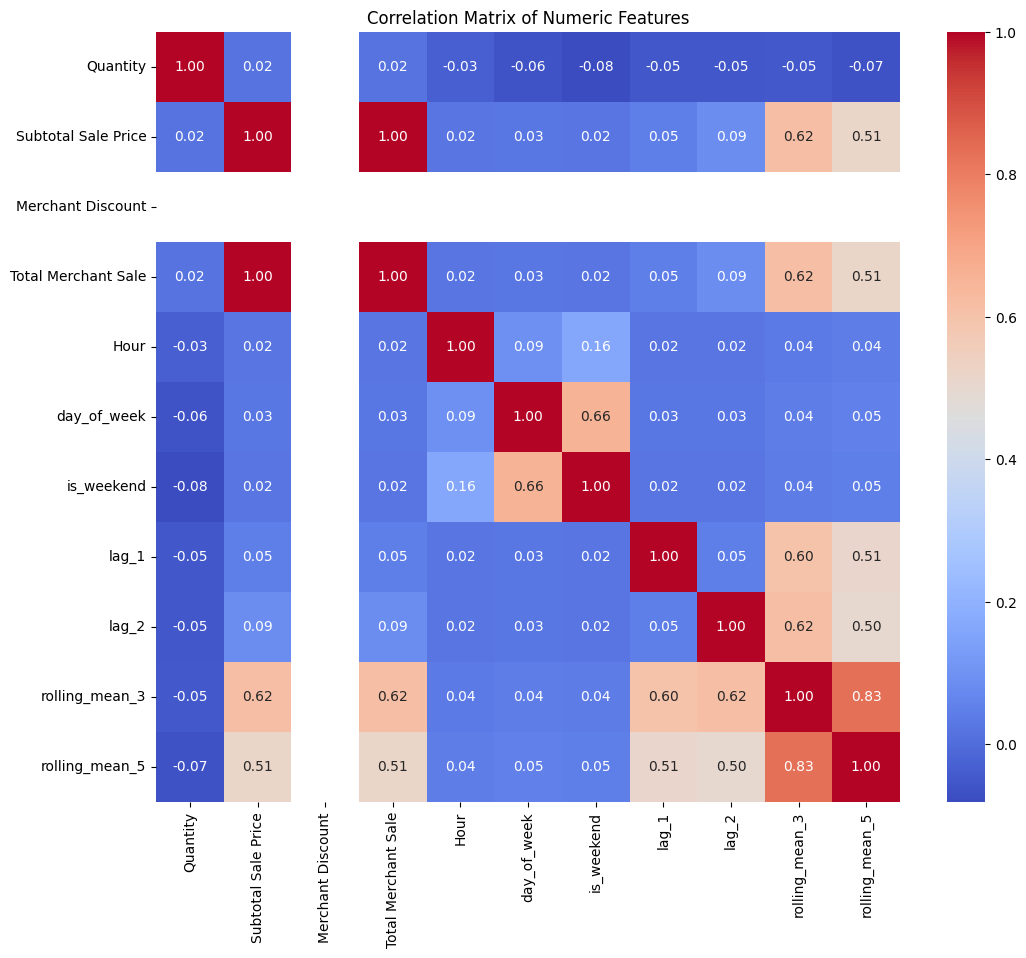

In [126]:
# prompt: visualize the correlations of df using a heatmap for numerical features

# Assuming df_encoded is your DataFrame after encoding
# Exclude datetime columns and object columns for correlation analysis

numeric_df = df.select_dtypes(exclude=['datetime64[ns]', 'object'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #added annot=True
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [127]:
# prompt: drop columns time interval and merchant discount

# Drop the specified columns
df.drop(columns=['Time Interval', 'Merchant Discount', 'Subtotal Sale Price'], inplace=True)

# Display info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14828 entries, 1 to 14854
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order Date           14828 non-null  datetime64[ns]
 1   Category             14828 non-null  object        
 2   Item                 14828 non-null  object        
 3   Modifier Group       14828 non-null  object        
 4   Modifier             14828 non-null  object        
 5   Quantity             14828 non-null  int64         
 6   Total Merchant Sale  14828 non-null  float64       
 7   Hour                 14828 non-null  int64         
 8   day_of_week          14828 non-null  int32         
 9   is_weekend           14828 non-null  int64         
 10  lag_1                14827 non-null  float64       
 11  lag_2                14826 non-null  float64       
 12  rolling_mean_3       14826 non-null  float64       
 13  rolling_mean_5       14824 non-null 

In [128]:
df.isna().sum()

,0
Order Date,0
Category,0
Item,0
Modifier Group,0
Modifier,0
Quantity,0
Total Merchant Sale,0
Hour,0
day_of_week,0
is_weekend,0


In [129]:
df.fillna(method='bfill', inplace=True)

<ipython-input-129-168d8f9d469d>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [130]:
df.isna().sum()

,0
Order Date,0
Category,0
Item,0
Modifier Group,0
Modifier,0
Quantity,0
Total Merchant Sale,0
Hour,0
day_of_week,0
is_weekend,0


In [131]:
# prompt: split the data such that the test data contains the data starting from 25-09-24

# Split the data based on 'Order Date'
train = df[df['Order Date'] < '2024-09-25']
test = df[df['Order Date'] >= '2024-09-25']

# Separate features (X) and target variable (y)
X_train = train.drop(['Total Merchant Sale'], axis=1)
y_train = train['Total Merchant Sale']

X_test = test.drop(['Total Merchant Sale'], axis=1)
y_test = test['Total Merchant Sale']

Converting numerical features to categorical features

In [132]:
target_encoder = ce.TargetEncoder(cols=['Item', 'Modifier'])
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Fit one-hot encoder on training set only
onehot_encoder = ce.OneHotEncoder(cols=['Category', 'Modifier Group'])
X_train_encoded = onehot_encoder.fit_transform(X_train_encoded)
X_test_encoded = onehot_encoder.transform(X_test_encoded)

In [133]:
print(X_train_encoded.head())
print(X_test_encoded.head())

  Order Date  Category_1  Category_2  Category_3  Category_4  Category_5  \
1 2024-09-01           1           0           0           0           0   
2 2024-09-01           1           0           0           0           0   
3 2024-09-01           1           0           0           0           0   
4 2024-09-01           1           0           0           0           0   
5 2024-09-01           1           0           0           0           0   

   Category_6  Category_7  Category_8      Item  ...  Modifier Group_22  \
1           0           0           0  1.851863  ...                  0   
2           0           0           0  1.851863  ...                  0   
3           0           0           0  1.851863  ...                  0   
4           0           0           0  1.851863  ...                  0   
5           0           0           0  1.851863  ...                  0   

   Modifier  Quantity  Hour  day_of_week  is_weekend  lag_1  lag_2  \
1  6.734681        -1 

In [134]:
X_train_encoded.columns

Index(['Order Date', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Item',
       'Modifier Group_1', 'Modifier Group_2', 'Modifier Group_3',
       'Modifier Group_4', 'Modifier Group_5', 'Modifier Group_6',
       'Modifier Group_7', 'Modifier Group_8', 'Modifier Group_9',
       'Modifier Group_10', 'Modifier Group_11', 'Modifier Group_12',
       'Modifier Group_13', 'Modifier Group_14', 'Modifier Group_15',
       'Modifier Group_16', 'Modifier Group_17', 'Modifier Group_18',
       'Modifier Group_19', 'Modifier Group_20', 'Modifier Group_21',
       'Modifier Group_22', 'Modifier', 'Quantity', 'Hour', 'day_of_week',
       'is_weekend', 'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_mean_5'],
      dtype='object')

In [135]:
# prompt: Drop the column 'Order Date' from X_train_encoded and X_test_encoded

# Drop 'Order Date' column
X_train_encoded = X_train_encoded.drop(columns=['Order Date'])
X_test_encoded = X_test_encoded.drop(columns=['Order Date'])

In [136]:
# prompt: standardize x_train_encoded and x_test_encoded

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [137]:
X_train_scaled.shape

(11375, 40)

# Model training

In [138]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np

# Assume y_train is the target column with Total Merchant Sale
# Compute weights: Give less weight to $0.00 sales and more to non-zero sales
sample_weights = compute_sample_weight(class_weight='balanced', y=np.where(y_train > 0, 1, 0))

# Initialize and fit the model with sample weights
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train, sample_weight=sample_weights)

RandomForestRegressor()

In [139]:
# prompt: evaluate the model by predicting on the test data. use mae, r2, f1-score

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import f1_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate F1-score (requires converting predictions to classes)
# Determine a threshold to convert predictions to binary classes (e.g., > 0)
threshold = 0  # Example: classify as 1 if prediction is greater than 0, otherwise 0
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"F1-score: {f1}")

Mean Absolute Error (MAE): 0.021328525919490332
R-squared (R2): 0.9858711095539894
F1-score: 0.8936170212765957


In [140]:
# # Define models to train
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'Random Forest': RandomForestRegressor(),
#     'Gradient Boosting': GradientBoostingRegressor(),
# }

# def evaluate_model_with_weights(model, X_train, y_train, X_test, y_test):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Separate zero and non-zero sales for custom weighting
#     zero_indices = (y_test == 0)
#     non_zero_indices = (y_test > 0)

#     # Define sample weights: Higher weight for non-zero sales to handle imbalance
#     weights = np.where(y_test == 0, 0.5, 1.5)  # You can adjust the weights

#     # Weighted RMSE and MAE
#     rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred, sample_weight=weights))
#     mae_weighted = mean_absolute_error(y_test, y_pred, sample_weight=weights)

#     # RMSE and MAE for zero and non-zero sales
#     rmse_zero = np.sqrt(mean_squared_error(y_test[zero_indices], y_pred[zero_indices]))
#     rmse_non_zero = np.sqrt(mean_squared_error(y_test[non_zero_indices], y_pred[non_zero_indices]))

#     mae_zero = mean_absolute_error(y_test[zero_indices], y_pred[zero_indices])
#     mae_non_zero = mean_absolute_error(y_test[non_zero_indices], y_pred[non_zero_indices])

#     # Standard R² score
#     r2 = r2_score(y_test, y_pred)

#     return {
#         'Weighted RMSE': rmse_weighted,
#         'Weighted MAE': mae_weighted,
#         'RMSE (Zero Sales)': rmse_zero,
#         'RMSE (Non-Zero Sales)': rmse_non_zero,
#         'MAE (Zero Sales)': mae_zero,
#         'MAE (Non-Zero Sales)': mae_non_zero,
#         'R² Score': r2
#     }

# # Loop through models and evaluate with weighted metrics
# results = {}
# for name, model in models.items():
#     print(f"Training and evaluating: {name}")
#     metrics = evaluate_model_with_weights(model, X_train_scaled, y_train, X_test_scaled, y_test)
#     results[name] = metrics

# # Display results
# results_df = pd.DataFrame(results).T
# print(results_df)

# # Save results to a CSV file
# results_df.to_csv('weighted_model_evaluation_results.csv', index=True)

In [141]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# # from catboost import CatBoostRegressor

# # Custom loss function for XGBoost
# def xgb_custom_loss(y_true, y_pred):
#     residual = y_true - y_pred
#     # Assign higher penalty to non-zero sales
#     grad = -np.where(y_true == 0, 0.5 * residual, 1.5 * residual)
#     hess = np.ones_like(grad)
#     return grad, hess

# # Custom loss function for LightGBM
# def lgbm_custom_loss(y_true, y_pred):
#     residual = y_true - y_pred
#     # Assign higher penalty to non-zero sales
#     loss = np.where(y_true == 0, 0.5 * residual**2, 1.5 * residual**2)
#     grad = -2 * residual * np.where(y_true == 0, 0.5, 1.5)
#     hess = 2 * np.ones_like(residual) * np.where(y_true == 0, 0.5, 1.5)
#     return grad, hess

# # Dictionary of models
# models = {
#     'XGBoost': XGBRegressor(objective=xgb_custom_loss, eval_metric='rmse', n_estimators=100, learning_rate=0.1),
#     'LightGBM': LGBMRegressor(objective=lgbm_custom_loss, n_estimators=100, learning_rate=0.1),
#     # 'CatBoost': CatBoostRegressor(loss_function=catboost_custom_loss, iterations=100, learning_rate=0.1, verbose=0)
# }

# # Function to evaluate models with weighted metrics
# def evaluate_model_with_weights(model, X_train, y_train, X_test, y_test):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Define weights: Higher weight for non-zero sales
#     weights = np.where(y_test == 0, 0.5, 1.5)

#     # Weighted RMSE and MAE
#     rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred, sample_weight=weights))
#     mae_weighted = mean_absolute_error(y_test, y_pred, sample_weight=weights)

#     # Separate RMSE and MAE for zero and non-zero sales
#     rmse_zero = np.sqrt(mean_squared_error(y_test[y_test == 0], y_pred[y_test == 0]))
#     rmse_non_zero = np.sqrt(mean_squared_error(y_test[y_test > 0], y_pred[y_test > 0]))

#     mae_zero = mean_absolute_error(y_test[y_test == 0], y_pred[y_test == 0])
#     mae_non_zero = mean_absolute_error(y_test[y_test > 0], y_pred[y_test > 0])

#     # R² score
#     r2 = r2_score(y_test, y_pred)

#     return {
#         'Weighted RMSE': rmse_weighted,
#         'Weighted MAE': mae_weighted,
#         'RMSE (Zero Sales)': rmse_zero,
#         'RMSE (Non-Zero Sales)': rmse_non_zero,
#         'MAE (Zero Sales)': mae_zero,
#         'MAE (Non-Zero Sales)': mae_non_zero,
#         'R² Score': r2
#     }

# # Loop through the models and evaluate them
# results = {}
# for name, model in models.items():
#     print(f"Training and evaluating: {name}")
#     metrics = evaluate_model_with_weights(model, X_train_scaled, y_train, X_test_scaled, y_test)
#     results[name] = metrics

# # Display results
# results_df = pd.DataFrame(results).T
# print(results_df)

# # Save the results to a CSV file
# # results_df.to_csv('weighted_model_evaluation_results.csv', index=True)
# # Save the results to a CSV file (append mode)
# results_df.to_csv('weighted_model_evaluation_results.csv', index=True, mode='a', header=not bool(pd.read_csv('weighted_model_evaluation_results.csv').empty))

In [142]:
# Define models to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

def evaluate_model_with_weights(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Separate zero and non-zero sales for custom weighting
    zero_indices = (y_test == 0)
    non_zero_indices = (y_test > 0)

    # Define sample weights: Higher weight for non-zero sales to handle imbalance
    weights = np.where(y_test == 0, 0.5, 1.5)  # You can adjust the weights

    # Weighted RMSE and MAE
    rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred, sample_weight=weights))
    mae_weighted = mean_absolute_error(y_test, y_pred, sample_weight=weights)

    # RMSE and MAE for zero and non-zero sales
    rmse_zero = np.sqrt(mean_squared_error(y_test[zero_indices], y_pred[zero_indices]))
    rmse_non_zero = np.sqrt(mean_squared_error(y_test[non_zero_indices], y_pred[non_zero_indices]))

    mae_zero = mean_absolute_error(y_test[zero_indices], y_pred[zero_indices])
    mae_non_zero = mean_absolute_error(y_test[non_zero_indices], y_pred[non_zero_indices])

    # Standard R² score
    r2 = r2_score(y_test, y_pred)

    # Calculate F1 Score (binary classification style: y_pred > 0.5 as positive)
    y_pred_class = (y_pred > 0.5).astype(int)
    y_test_class = (y_test > 0).astype(int)
    f1 = f1_score(y_test_class, y_pred_class)

    return {
        'Weighted RMSE': rmse_weighted,
        'Weighted MAE': mae_weighted,
        'RMSE (Zero Sales)': rmse_zero,
        'RMSE (Non-Zero Sales)': rmse_non_zero,
        'MAE (Zero Sales)': mae_zero,
        'MAE (Non-Zero Sales)': mae_non_zero,
        'R² Score': r2,
        'F1 Score': f1
    }

# Loop through models and evaluate with weighted metrics
results = {}
for name, model in models.items():
    print(f"Training and evaluating: {name}")
    metrics = evaluate_model_with_weights(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[name] = metrics

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Save results to a CSV file
results_df.to_csv('weighted_model_evaluation_results1.csv', index=True)

# -------- Second Code Block --------


Training and evaluating: Linear Regression
Training and evaluating: Ridge Regression
Training and evaluating: Lasso Regression
Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
                   Weighted RMSE  Weighted MAE  RMSE (Zero Sales)  \
Linear Regression       0.302327      0.008369       2.319734e-14   
Ridge Regression        0.002089      0.000822       7.407166e-04   
Lasso Regression        2.769204      1.022106       3.863031e-01   
Random Forest           0.279495      0.037673       1.440405e-01   
Gradient Boosting       0.335213      0.102334       1.439091e-01   

                   RMSE (Non-Zero Sales)  MAE (Zero Sales)  \
Linear Regression               0.718583      1.125050e-14   
Ridge Regression                0.004701      3.628607e-04   
Lasso Regression                6.529026      3.466740e-01   
Random Forest                   0.587239      6.609621e-03   
Gradient Boosting               0.733838      2.410113e-02   

   

In [143]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

# Custom loss function for XGBoost
def xgb_custom_loss(y_true, y_pred):
    residual = y_true - y_pred
    # Assign higher penalty to non-zero sales
    grad = -np.where(y_true == 0, 0.5 * residual, 1.5 * residual)
    hess = np.ones_like(grad)
    return grad, hess

# Custom loss function for LightGBM
def lgbm_custom_loss(y_true, y_pred):
    residual = y_true - y_pred
    # Assign higher penalty to non-zero sales
    loss = np.where(y_true == 0, 0.5 * residual**2, 1.5 * residual**2)
    grad = -2 * residual * np.where(y_true == 0, 0.5, 1.5)
    hess = 2 * np.ones_like(residual) * np.where(y_true == 0, 0.5, 1.5)
    return grad, hess

# Dictionary of models
models = {
    'XGBoost': XGBRegressor(objective=xgb_custom_loss, eval_metric='rmse', n_estimators=100, learning_rate=0.1),
    'LightGBM': LGBMRegressor(objective=lgbm_custom_loss, n_estimators=100, learning_rate=0.1),
    # 'CatBoost': CatBoostRegressor(loss_function=catboost_custom_loss, iterations=100, learning_rate=0.1, verbose=0)
}

# Function to evaluate models with weighted metrics
def evaluate_model_with_weights(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Define weights: Higher weight for non-zero sales
    weights = np.where(y_test == 0, 0.5, 1.5)

    # Weighted RMSE and MAE
    rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred, sample_weight=weights))
    mae_weighted = mean_absolute_error(y_test, y_pred, sample_weight=weights)

    # Separate RMSE and MAE for zero and non-zero sales
    rmse_zero = np.sqrt(mean_squared_error(y_test[y_test == 0], y_pred[y_test == 0]))
    rmse_non_zero = np.sqrt(mean_squared_error(y_test[y_test > 0], y_pred[y_test > 0]))

    mae_zero = mean_absolute_error(y_test[y_test == 0], y_pred[y_test == 0])
    mae_non_zero = mean_absolute_error(y_test[y_test > 0], y_pred[y_test > 0])

    # R² score
    r2 = r2_score(y_test, y_pred)

    # Calculate F1 Score (binary classification style: y_pred > 0.5 as positive)
    y_pred_class = (y_pred > 0.5).astype(int)
    y_test_class = (y_test > 0).astype(int)
    f1 = f1_score(y_test_class, y_pred_class)

    return {
        'Weighted RMSE': rmse_weighted,
        'Weighted MAE': mae_weighted,
        'RMSE (Zero Sales)': rmse_zero,
        'RMSE (Non-Zero Sales)': rmse_non_zero,
        'MAE (Zero Sales)': mae_zero,
        'MAE (Non-Zero Sales)': mae_non_zero,
        'R² Score': r2,
        'F1 Score': f1
    }

# Loop through the models and evaluate them
results = {}
for name, model in models.items():
    print(f"Training and evaluating: {name}")
    metrics = evaluate_model_with_weights(model, X_train_scaled, y_train, X_test_scaled, y_test)
    results[name] = metrics

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Save the results to a CSV file
results_df.to_csv('weighted_model_evaluation_results1.csv', index=True, mode='a', header=not bool(pd.read_csv('weighted_model_evaluation_results.csv').empty))


Training and evaluating: XGBoost
Training and evaluating: LightGBM
[LightGBM] [Info] Using self-defined objective function
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 11375, number of used features: 33
[LightGBM] [Info] Using self-defined objective function
          Weighted RMSE  Weighted MAE  RMSE (Zero Sales)  \
XGBoost        0.217241      0.038419           0.104883   
LightGBM       0.406881      0.063579           0.224887   

          RMSE (Non-Zero Sales)  MAE (Zero Sales)  MAE (Non-Zero Sales)  \
XGBoost                0.464187          0.011853              0.161931   
LightGBM               0.836736          0.021942              0.257163   

          R² Score  F1 Score  
XGBoost   0.992887  0.978723  


In [144]:
# prompt: extract the trained xgboost model from earlier

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are defined from previous code

# Custom loss function for XGBoost (as defined in the original code)
def xgb_custom_loss(y_true, y_pred):
    residual = y_true - y_pred
    grad = -np.where(y_true == 0, 0.5 * residual, 1.5 * residual)
    hess = np.ones_like(grad)
    return grad, hess

# Initialize and train the XGBoost model
model = XGBRegressor(objective=xgb_custom_loss, eval_metric='rmse', n_estimators=100, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

# Extract and save the trained model
model.save_model("trained_xgboost_model.json")

In [145]:
test_data=pd.read_csv('X_scaled.csv')

In [146]:
test_data.drop(test_data.columns[0], axis=1, inplace=True)

In [147]:
test_data.shape

(25161, 40)

In [148]:
test_data.head()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Item,...,Modifier Group_21,Modifier,Quantity,Hour,day_of_week,is_weekend,lag_1,lag_2,rolling_mean_3,rolling_mean_5
0,0.306058,-0.098547,-0.231515,-0.052819,-0.118771,-0.065657,-0.058564,-0.026756,-0.006304,-0.249663,...,-0.008916,0.723994,0.234069,-1.542193,-0.748961,-0.264571,0.922256,0.922198,0.343314,0.130265
1,0.306058,-0.098547,-0.231515,-0.052819,-0.118771,-0.065657,-0.058564,-0.026756,-0.006304,-0.249663,...,-0.008916,-0.330976,0.234069,-1.542193,-0.748961,-0.264571,0.922256,0.922198,0.343314,0.130265
2,0.306058,-0.098547,-0.231515,-0.052819,-0.118771,-0.065657,-0.058564,-0.026756,-0.006304,-0.249663,...,-0.008916,-0.330976,0.234069,-1.542193,-0.748961,-0.264571,-0.149653,0.922198,0.343314,0.130265
3,0.306058,-0.098547,-0.231515,-0.052819,-0.118771,-0.065657,-0.058564,-0.026756,-0.006304,-0.249663,...,-0.008916,-0.330976,0.234069,-1.542193,-0.748961,-0.264571,-0.149653,-0.149694,-0.247306,0.130265
4,0.306058,-0.098547,-0.231515,-0.052819,-0.118771,-0.065657,-0.058564,-0.026756,-0.006304,-0.249663,...,-0.008916,-0.330976,0.234069,-1.542193,-0.748961,-0.264571,-0.149653,-0.149694,-0.247306,0.130265


In [149]:
# prompt: use the trained XGboost model  trained earlier to predict on the test (X_scaled) data
# Load the saved XGBoost model
model = XGBRegressor()
model.load_model("trained_xgboost_model.json")

# Make predictions on the test data
y_pred = model.predict(test_data)

In [150]:
# prompt: compare y_pred and import y_total_merchant_sales.csv

import pandas as pd
import numpy as np

# Load the actual sales data
try:
    y_total_merchant_sales = pd.read_csv('y_total_merchant_sales.csv')
    y_actual = y_total_merchant_sales['Total Merchant Sale'] # Assuming the target column is named 'Total Merchant Sale'
except FileNotFoundError:
    print("Error: 'y_total_merchant_sales.csv' not found. Please upload the file.")
    y_actual = None # Handle the case where the file is not found

# Assuming y_pred is defined from your previous code (model prediction)
# Example y_pred (replace this with your actual y_pred)
# y_pred = np.random.rand(len(y_actual))


In [151]:
test_data.shape

(25161, 40)

In [152]:
y_actual.shape

(25161,)

In [155]:

if y_actual is not None:
    # Compare y_pred and y_actual
    comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_actual': y_actual})
    print(comparison_df.head())

    # Calculate metrics (example: Mean Absolute Error)
    mae = mean_absolute_error(y_actual, y_pred)
    print(f"Mean Absolute Error: {mae}")

    # Example: Save the comparison to a CSV file
    comparison_df.to_csv('y_pred_vs_y_actual.csv', index=False)

     y_pred  y_actual
0  0.195700       2.0
1  0.033548       0.0
2  0.718679       0.0
3  0.003928       0.0
4  0.003928       0.0
Mean Absolute Error: 0.09057905900703736


In [156]:
# prompt: evaluate using F1 score

# Assuming y_pred and y_test are defined from previous code

# Calculate F1-score (requires converting predictions to classes)
# Determine a threshold to convert predictions to binary classes (e.g., > 0)
threshold = 0  # Example: classify as 1 if prediction is greater than 0, otherwise 0
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_actual > threshold).astype(int)

f1 = f1_score(y_test_binary, y_pred_binary)

print(f"F1-score: {f1}")

F1-score: 0.10013992360927278


In [157]:
# prompt: evaluate using other metrics

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, precision_score, recall_score, accuracy_score

# Assuming y_pred and y_actual are defined from your previous code

# Additional Metrics Calculation
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_actual, y_pred)

# For classification-style metrics (using threshold)
threshold = 0
y_pred_binary = (y_pred > threshold).astype(int)
y_actual_binary = (y_actual > threshold).astype(int)

precision = precision_score(y_actual_binary, y_pred_binary)
recall = recall_score(y_actual_binary, y_pred_binary)
f1 = f1_score(y_actual_binary, y_pred_binary)
accuracy = accuracy_score(y_actual_binary, y_pred_binary)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")


# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R2', 'Precision', 'Recall', 'F1-score', 'Accuracy'],
    'Value': [mse, rmse, r2, precision, recall, f1, accuracy]
})

# Save the results to a CSV file
results_df.to_csv('additional_metrics_results.csv', index=False)

Mean Squared Error (MSE): 0.3719294300329277
Root Mean Squared Error (RMSE): 0.609860172525578
R-squared (R2): 0.8931607416933723
Precision: 0.05271120312126762
Recall: 0.999245283018868
F1-score: 0.10013992360927278
Accuracy: 0.05429037001708994
